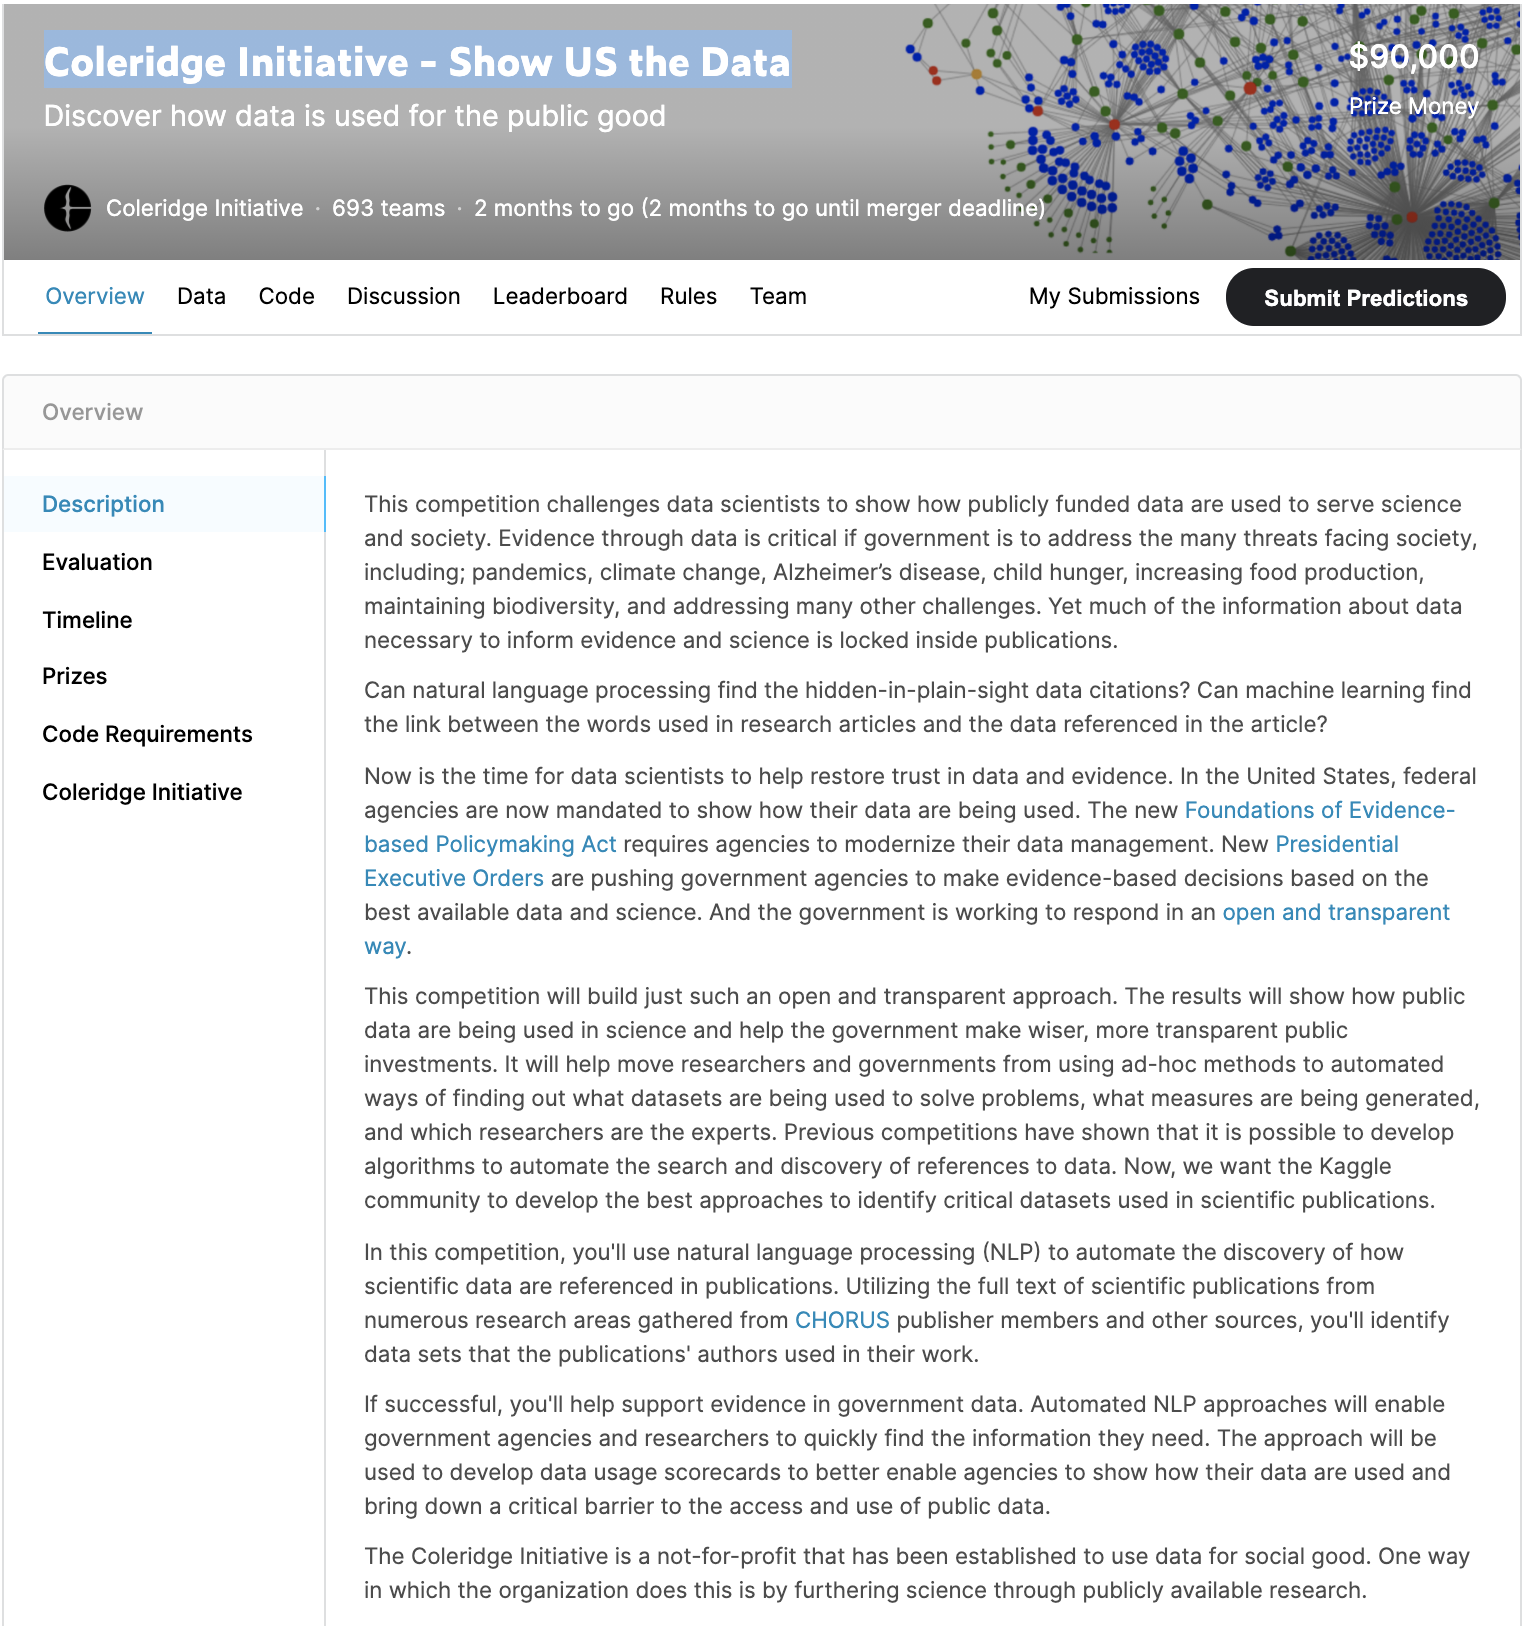

Resources 


1.   [Coleridge Data Examples](https://coleridgeinitiative.org/data-products/)
2.   [Rich Search and Discovery for Research Datasets](https://study.sagepub.com/richcontext)
3.    [Democratizing Our Data](https://mitpress.mit.edu/books/democratizing-our-data)
4.   [NSF"Rich Context" Video](https://www.youtube.com/watch?v=PIReIlsTI8U)



# To Analyse

**Use Natural language processing to analyse the publications and find if the government funding is used to serve science & Society.**

In [24]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import re
import json
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm.autonotebook import tqdm
from functools import partial
from wordcloud import WordCloud, STOPWORDS
import nltk
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
nlp.max_length = 4000000
from nltk.probability import FreqDist

In [26]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [27]:
import io 
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


**Data Description**

*   id- publication id - note that there are multiple rows for some training documents, indicating multiple mentioned datasets.
*   pub_title-title of the publication (a small number of publications have the same title).
*   dataset_title-the title of the dataset that is mentioned within the publication.
*   dataset_label-a portion of the text that indicates the dataset.
*   cleaned_label-the dataset_label, as passed through the clean_text function from the Evaluation page.

In [28]:
train.columns

Index(['Id', 'pub_title', 'dataset_title', 'dataset_label', 'cleaned_label'], dtype='object')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


So we don't have any null values in the train data 

In [30]:
for col in train.columns:
  print(col + ':' + str(len(train[col].unique())))

Id:14316
pub_title:14271
dataset_title:45
dataset_label:130
cleaned_label:130


**Inference**
  * The Training dataset has 19661 publications but only 14316 is unique publications. 
  * The pub_title is less than number of unique publications. It implies that some unique publications have same titles. 
  * The number of datasets used in these publications is 45. 

In [35]:
from google.colab import files 
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [36]:
import io

sample = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
sample.head()

,Id,PredictionString
0,2100032a-7c33-4bff-97ef-690822c43466,NaN
1,2f392438-e215-4169-bebf-21ac4ff253e1,NaN
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,NaN
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,NaN


**Sample Data Description**



*   id - Publication id 
*   Prediction string - To be filled with equivalent of cleaned_data of train data. 


